In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_excel('aqar.xlsx')
data.head()

,Unnamed: 0,Price,#Bedrooms,#Bathrooms,Size(m²),District,StreetWidth
0,0,120000,3,1,66,الشميسي,5
1,1,800000,5,3,240,طويق,20
2,2,1100000,5,5,375,طويق,15
3,3,5000000,5,5,2200,الناصرية,5
4,4,150000,1,2,125,الصالحية,13


In [38]:
data.describe()

,Unnamed: 0,Price,#Bedrooms,#Bathrooms,Size(m²),StreetWidth
count,5504.000000,5.504000e+03,5504.000000,5504.000000,5504.000000,5504.000000
mean,1712.874273,1.193790e+06,4.414608,3.863009,363.307776,15.480923
std,1115.242166,1.276224e+06,1.108494,1.251908,318.800361,9.261991
min,0.000000,9.000000e+02,1.000000,1.000000,50.000000,1.000000
25%,779.750000,3.000000e+05,4.000000,3.000000,183.000000,10.000000
50%,1554.000000,1.050000e+06,5.000000,4.000000,307.000000,15.000000
75%,2603.250000,1.400000e+06,5.000000,5.000000,400.000000,20.000000
max,3979.000000,3.000000e+07,7.000000,5.000000,3000.000000,100.000000


In [41]:
data = data.iloc[:,1:]
data.head()

,Price,#Bedrooms,#Bathrooms,Size(m²),District,StreetWidth
0,120000,3,1,66,الشميسي,5
1,800000,5,3,240,طويق,20
2,1100000,5,5,375,طويق,15
3,5000000,5,5,2200,الناصرية,5
4,150000,1,2,125,الصالحية,13


In [44]:
data.describe()

,Price,#Bedrooms,#Bathrooms,Size(m²),StreetWidth
count,5.504000e+03,5504.000000,5504.000000,5504.000000,5504.000000
mean,1.193790e+06,4.414608,3.863009,363.307776,15.480923
std,1.276224e+06,1.108494,1.251908,318.800361,9.261991
min,9.000000e+02,1.000000,1.000000,50.000000,1.000000
25%,3.000000e+05,4.000000,3.000000,183.000000,10.000000
50%,1.050000e+06,5.000000,4.000000,307.000000,15.000000
75%,1.400000e+06,5.000000,5.000000,400.000000,20.000000
max,3.000000e+07,7.000000,5.000000,3000.000000,100.000000


In [7]:
data['Price'].nsmallest(10)

4543      900
20      10000
216     55000
193     60000
161     66000
239     70000
240     70000
263     80000
270     80000
1515    80000
Name: Price, dtype: int64

In [8]:
data.iloc[4543,:]

Price               900
#Bedrooms             6
#Bathrooms            4
Size(m²)            310
District       المنصورة
StreetWidth          15
Name: 4543, dtype: object

In [9]:
data = data.drop(index = 4543)

In [10]:
quantiles_25 = data.quantile(0.25)
quantiles_75 = data.quantile(0.75)

In [11]:
IQR = quantiles_75 - quantiles_25
lower_range = quantiles_25 - (1.5 * IQR)
upper_range = quantiles_75 + (1.5 * IQR)

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

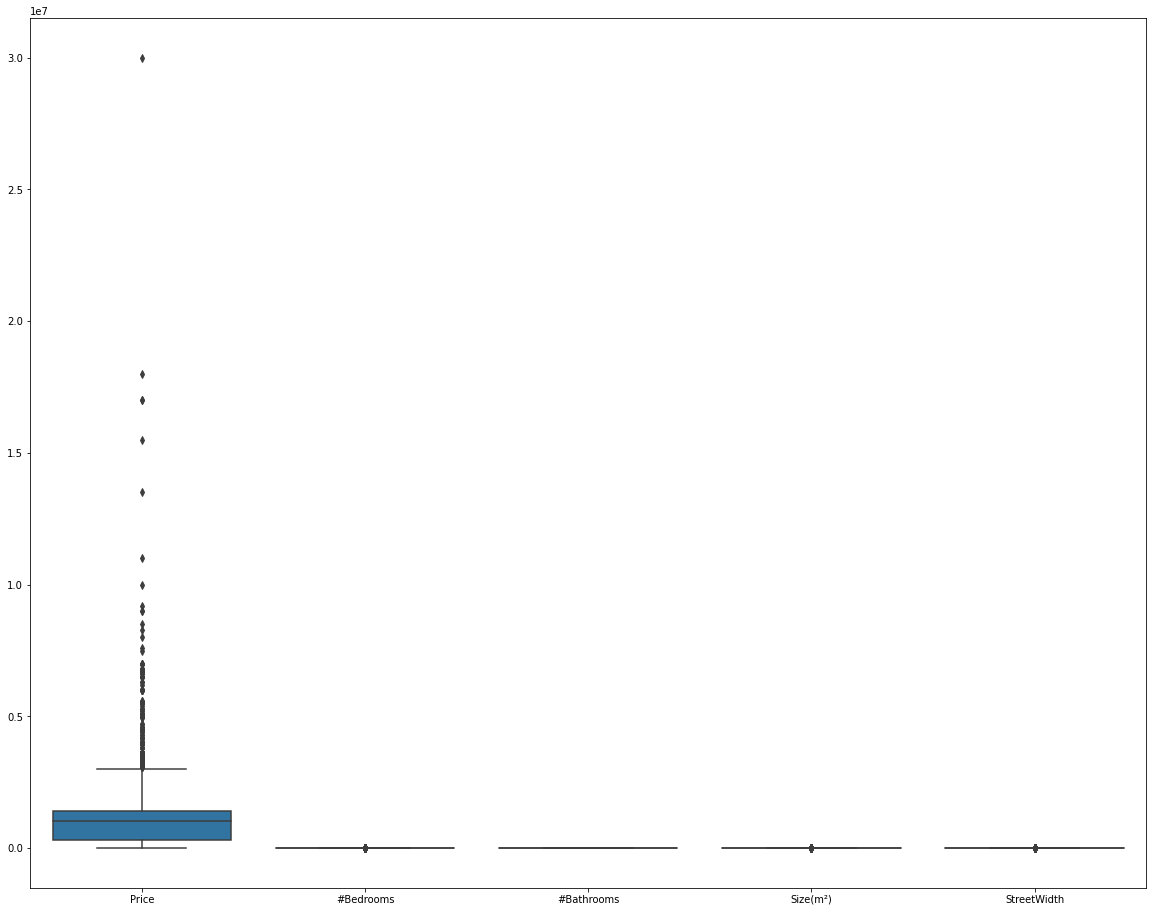

In [13]:
fig, ax = plt.subplots(1,1, figsize = (20,16))
sb.boxplot(data = data, ax = ax)


Clearly shows that price has some heavy outliers

In [14]:
data.describe()

,Price,#Bedrooms,#Bathrooms,Size(m²),StreetWidth
count,5.503000e+03,5503.000000,5503.000000,5503.000000,5503.000000
mean,1.194007e+06,4.414319,3.862984,363.317463,15.481010
std,1.276239e+06,1.108389,1.252021,318.828521,9.262831
min,1.000000e+04,1.000000,1.000000,50.000000,1.000000
25%,3.000000e+05,4.000000,3.000000,183.000000,10.000000
50%,1.050000e+06,5.000000,4.000000,307.000000,15.000000
75%,1.400000e+06,5.000000,5.000000,400.000000,20.000000
max,3.000000e+07,7.000000,5.000000,3000.000000,100.000000


In [15]:
data.corr(method = 'spearman')

,Price,#Bedrooms,#Bathrooms,Size(m²),StreetWidth
Price,1.000000,0.182124,0.550010,0.749320,0.235701
#Bedrooms,0.182124,1.000000,0.476931,0.213027,0.117083
#Bathrooms,0.550010,0.476931,1.000000,0.476240,0.227267
Size(m²),0.749320,0.213027,0.476240,1.000000,0.119001
StreetWidth,0.235701,0.117083,0.227267,0.119001,1.000000


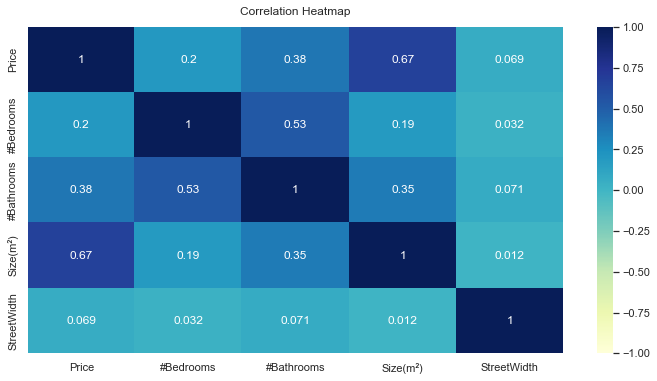

In [34]:
import seaborn as sns
sns.set()
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [16]:
dummies = pd.get_dummies(data['District'], prefix = 'district')
data_new = pd.concat([data,dummies], axis = 1)
data_new

,Price,#Bedrooms,#Bathrooms,Size(m²),District,StreetWidth,district_أحد,district_اشبيلية,district_الازدهار,district_الاندلس,...,district_عريض,district_عكاظ,district_غبيرة,district_غرناطة,district_قرطبة,district_لبن,district_منفوحة,district_منفوحة الجديدة,district_نمار,district_هيت
0,120000,3,1,66,الشميسي,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800000,5,3,240,طويق,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100000,5,5,375,طويق,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5000000,5,5,2200,الناصرية,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,150000,1,2,125,الصالحية,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,1250000,4,5,200,المهدية,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500,1300000,5,5,200,المهدية,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5501,1850000,4,5,270,العارض,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5502,5300000,5,5,500,الملقا,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data_new = data_new.drop('District', axis = 1)

In [18]:
DF =data_new.copy()

In [19]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso, LassoCV ,RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
X = DF.drop('Price', axis = 1)

In [35]:
X.columns

Index(['#Bedrooms', '#Bathrooms', 'Size(m²)', 'StreetWidth', 'district_أحد',
       'district_اشبيلية', 'district_الازدهار', 'district_الاندلس',
       'district_البديعة', 'district_البرية',
       ...
       'district_عريض', 'district_عكاظ', 'district_غبيرة', 'district_غرناطة',
       'district_قرطبة', 'district_لبن', 'district_منفوحة',
       'district_منفوحة الجديدة', 'district_نمار', 'district_هيت'],
      dtype='object', length=117)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, DF[['Price']], 
                                                    test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [24]:
list_models=[]
list_scores=[]
list_errors=[]
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_1=lr.predict(X_val)
score_1=r2_score(y_val,pred_1)
error_1=mean_squared_error(y_val,pred_1)
list_models.append('linear regression')
list_scores.append(score_1)
list_errors.append(error_1)
print("Training accuracy: ",r2_score(y_train,lr.predict(X_train)))
print("Training error: ",1-r2_score(y_train,lr.predict(X_train)))
print("Validaton accuracy: ",r2_score(y_val,lr.predict(X_val)))
print("Validation error: ",1-r2_score(y_val,lr.predict(X_val)))

Training accuracy:  0.8592949477522274
Training error:  0.14070505224777263
validaton accuracy:  -387873772243966.4
validation error:  387873772243967.4


In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred_2=rf.predict(X_val)
score_2=r2_score(y_val,pred_2)
error_2=mean_squared_error(y_val,pred_2)
list_models.append('Random Forest Regressor')
list_scores.append(score_2)
list_errors.append(error_2)
print("Training accuracy: ",r2_score(y_train,rf.predict(X_train)))
print("Training error: ",1-r2_score(y_train,rf.predict(X_train)))
print("validation accuracy: ",r2_score(y_val,rf.predict(X_val)))
print("validation error: ",1-r2_score(y_val,rf.predict(X_val)))

<ipython-input-26-aeb7946cb102>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Training accuracy:  0.9820119691523945
Training error:  0.017988030847605474
validation accuracy:  0.7802488283932811
validation error:  0.21975117160671886


In [27]:
from sklearn.linear_model import Ridge

In [28]:
rdg=Ridge(alpha=1)
rdg.fit(X_train,y_train)
pred_3=rdg.predict(X_val)
score_3=r2_score(y_val,pred_3)
error_3=mean_squared_error(y_val,pred_3)
list_models.append('Ridge')
list_scores.append(score_3)
list_errors.append(error_3)
print("Training accuracy: ",r2_score(y_train,rdg.predict(X_train)))
print("Training error: ",1-r2_score(y_train,rdg.predict(X_train)))
print("Testing accuracy: ",r2_score(y_val,rdg.predict(X_val)))
print("Testing error: ",1-r2_score(y_val,rdg.predict(X_val)))

Training accuracy:  0.8539049038374543
Training error:  0.14609509616254568
Testing accuracy:  0.7476404264255294
Testing error:  0.2523595735744706


In [29]:
print("Testing accuracy for Linear regression: ",r2_score(y_test,lr.predict(X_test)))
print("Testing error: ",1-r2_score(y_test,rf.predict(X_test)))
print("Testing accuracy for Random Forest Regressor: ",r2_score(y_test,rf.predict(X_test)))
print("Testing error: ",1-r2_score(y_test,rf.predict(X_test)))
print("Testing accuracy for Ridge: ",r2_score(y_test,rdg.predict(X_test)))
print("Testing error: ",1-r2_score(y_test,rdg.predict(X_test)))

Testing accuracy for Linear regression:  -1662057136277300.0
Testing error:  0.10605807382247556
Testing accuracy for Random Forest Regressor:  0.8939419261775244
Testing error:  0.10605807382247556
Testing accuracy for Ridge:  0.8517004403332569
Testing error:  0.14829955966674313


Text(0, 0.5, 'Predicted Price')

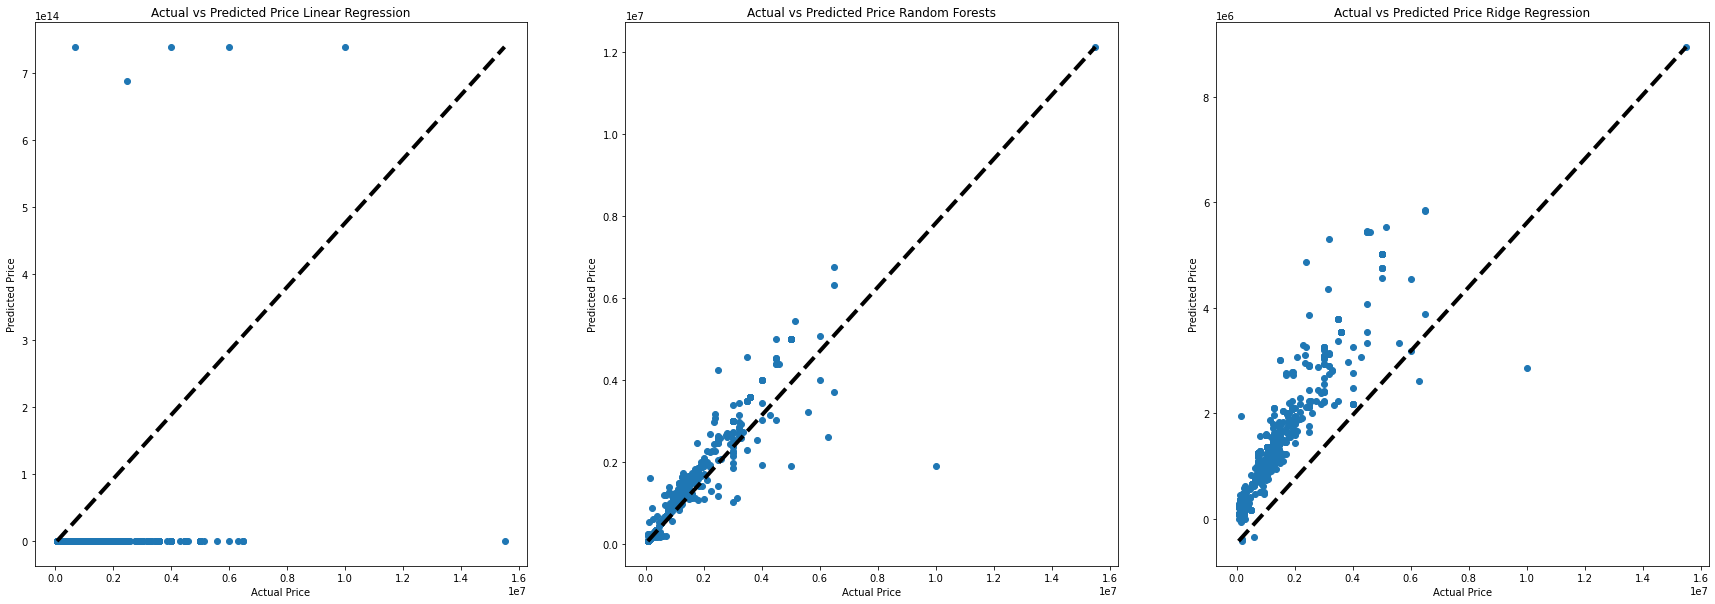

In [30]:
fig2,[ax2,ax3,ax4] = plt.subplots(1,3, figsize = (30,10))
ax2.scatter(y_test, lr.predict(X_test))
ax2.plot([y_test.min(), y_test.max()], [lr.predict(X_test).min(), lr.predict(X_test).max()], 'k--', lw=4)
ax3.scatter(y_test, rf.predict(X_test))
ax3.plot([y_test.min(), y_test.max()], [rf.predict(X_test).min(), rf.predict(X_test).max()], 'k--', lw=4)
ax4.scatter(y_test, rdg.predict(X_test))
ax4.plot([y_test.min(), y_test.max()], [rdg.predict(X_test).min(), rdg.predict(X_test).max()], 'k--', lw=4)
ax2.set_title('Actual vs Predicted Price Linear Regression')
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax3.set_title('Actual vs Predicted Price Random Forests')
ax3.set_xlabel('Actual Price')
ax3.set_ylabel('Predicted Price')
ax4.set_title('Actual vs Predicted Price Ridge Regression')
ax4.set_xlabel('Actual Price')
ax4.set_ylabel('Predicted Price')